##Index 190494A
##Name Ranasinghe K K H


#Blobs
#1

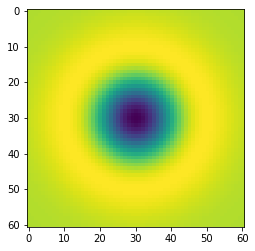

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sigma =10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)

(-33.0, 33.0, -33.0, 33.0)

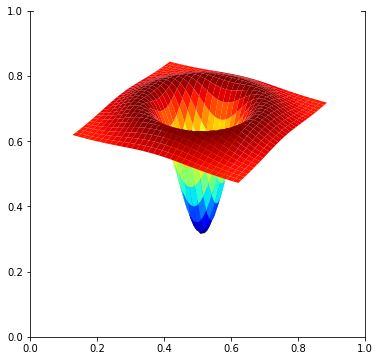

In [15]:
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax1 = fig.add_subplot(111,projection = '3d')
surf1 = ax1.plot_surface(X,Y,log,cmap=cm.jet)
plt.axis("off")

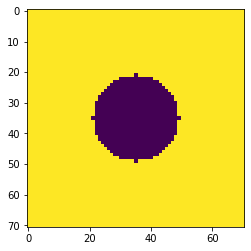

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

w, h = 71, 71
hw, hh = w//2, h//2

f = np.ones((h,w), dtype = np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh+1, 1), np.arange(-hw, hw+1, 1))

r = w//5 # 14
f *= X**2 + Y**2 > r**2

plt.imshow(f)

#2

(35, 35, 5)
10


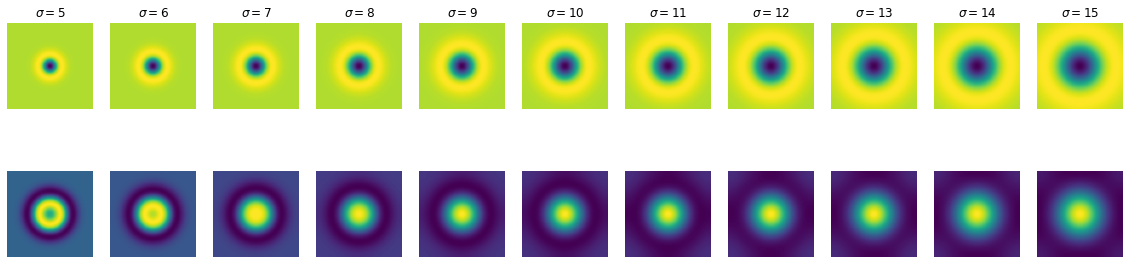

In [48]:
s = 11
fig, ax = plt.subplots(2, s, figsize = (20,5))
scale_space = np.empty((h, w, s), dtype = np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+ Y**2/(sigma**2) -2)* np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'. format(sigma))
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices)   # r =sqrt{2}*sigma



In [120]:
print("sigma = ",sigmas[indices[2]])

sigma =  10



 $\sigma = r/\sqrt{2}\\$
 $\sigma = 14/\sqrt{2}\\$
 Extremum $\sigma = 10$

#3

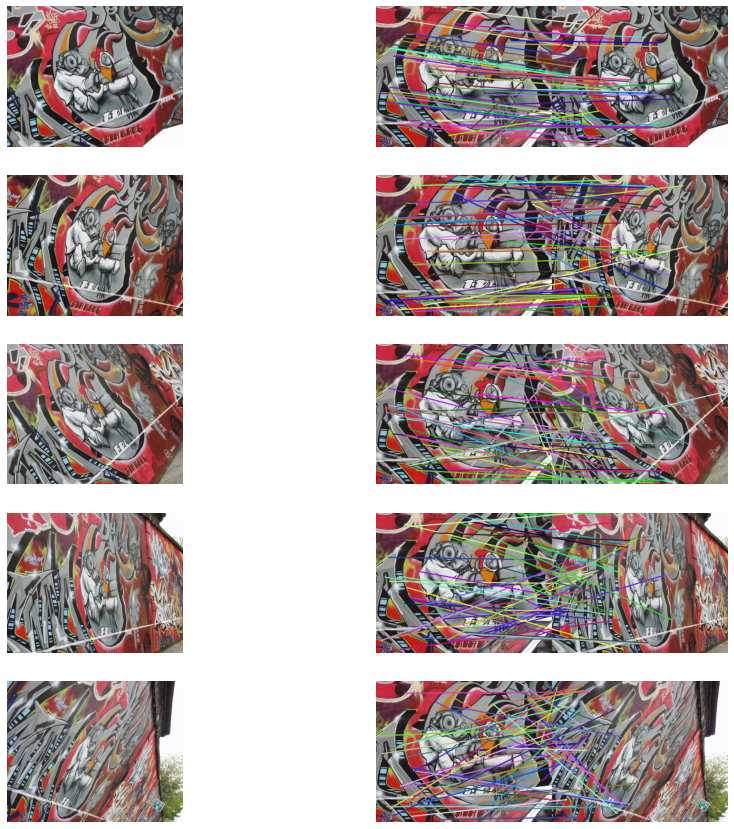

In [119]:
import cv2 as cv
img1= cv.imread("./graf/img1.ppm",cv.IMREAD_COLOR)
img2= cv.imread("./graf/img2.ppm",cv.IMREAD_COLOR)
img3= cv.imread("./graf/img3.ppm",cv.IMREAD_COLOR)
img4= cv.imread("./graf/img4.ppm",cv.IMREAD_COLOR)
img5= cv.imread("./graf/img5.ppm",cv.IMREAD_COLOR)
img6= cv.imread("./graf/img6.ppm",cv.IMREAD_COLOR)
img_lst=[img1,img2,img3,img4,img5,img6]
for i in range(len(img_lst)):
    img_lst[i]=cv.cvtColor(img_lst[i],cv.COLOR_BGR2RGB)



sift = cv.SIFT_create()
keypoint_lst=[None,None,None,None,None,None]
descriptors_lst=[None,None,None,None,None,None]
for i in range(len(img_lst)):
    keypoint_lst[i], descriptors_lst[i] = sift.detectAndCompute(img_lst[i],None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches_lst =[None,None,None,None,None,None]
for i in range(1,len(img_lst)):
    matches = bf.match(descriptors_lst[0],descriptors_lst[i])
    matches_lst[i-1] = sorted(matches, key = lambda x:x.distance)
fig,ax=plt.subplots(5,2,figsize=(15,15))
for i in range(1,len(img_lst)):
    
    img3 = cv.drawMatches(img_lst[0], keypoint_lst[0], img_lst[i],keypoint_lst[i], matches_lst[i-1][:50], img_lst[i],matchesThickness=4, flags=2)
    ax[i-1][1].imshow(img3),ax[i-1][0].imshow(img_lst[i])
    ax[i-1][0].axis("off"),ax[i-1][1].axis("off")


#Fitting Basics
#4

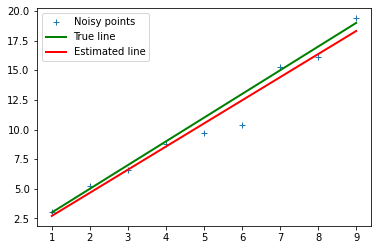

In [125]:
m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)
sigma=1
noise = sigma*np.random.randn(len(x))

o = np . zeros ( x . shape )
# o[=1] = 20
y = m*x + c + noise + o

n=len(x)

X =np.concatenate([x.reshape(n,1),np.ones((n,1))],axis=1)
B= np.linalg.pinv(X.T@X)@X.T@y
mstar =B[0]
cstar =B[1]
plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color ='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1],],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color ='r',linewidth=2,label=r'Estimated line')
plt.legend(loc='best')

#5

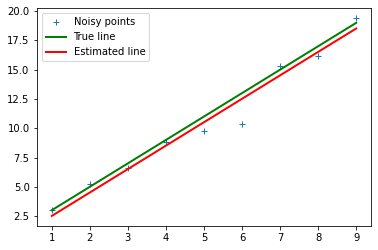

In [75]:
m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)
sigma=1
noise = sigma*np.random.randn(len(x))

o = np . zeros ( x . shape )
y = m*x + c + noise + o
n=len(x)
u11 =np.sum((x-np.mean(x))**2)
u12=np.sum((x-np.mean(x))*(y-np.mean(y)))
u21=u12
u22=np.sum((y-np.mean(y))**2)

U =np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)
ev_corresponding_to_smalest_ev =V[:,np.argmin(W)]
a=ev_corresponding_to_smalest_ev[0]
b =ev_corresponding_to_smalest_ev[1]
d = a*np.mean(x)+b*np.mean(y)

mstar= -a/b 
cstar = d/b 

plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color ='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color ='r',linewidth=2,label=r'Estimated line')
plt.legend(loc='best')